In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [42]:
data = np.array(pd.read_csv('dengue.csv').dropna()[['humid', 'temp' , 'h10pix', 'trees' , 'Xmin', 'Ymin']])
for i in range(np.size(data[0,:])):
    data[:,i]=(data[:,i]-np.mean(data[:,i]))/np.std(data[:,i])

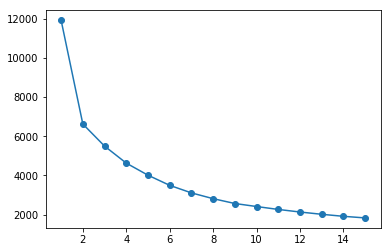

In [43]:
error=[]
clusters=[]
for i in range(1,16):
    errort=[]
    for j in range(5):
        kmeans = KMeans(n_clusters=i,random_state=np.random.randint(10))
        kmeans.fit(data)
        errort.append(kmeans.inertia_)
    error.append(np.mean(np.array(errort)))
    clusters.append(i)
plt.scatter(clusters,error) 
plt.plot(clusters,error)

In [44]:
#El numero optimo de clusters puede ser 3 ya que a partir de este punto ya no existe un cambio tan brusco.

In [45]:
data = pd.read_csv('BreadBasket_DMS.csv').dropna()
data['Time'] =pd.to_timedelta(data['Time'])/ pd.offsets.Minute(1)
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = (data['Date'] - data['Date'].min())  / np.timedelta64(1,'D')   
data = np.array(data)

In [47]:
pca = PCA()
pca.fit(data[:,:-1])
E=pca.explained_variance_/np.sum(pca.explained_variance_)

In [ ]:
error=[]
clusters=[]
for i in range(1,16):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data[:,:-1])
    error.append(kmeans.inertia_)
    clusters.append(i)
plt.scatter(clusters,error) 
plt.plot(clusters,error)

In [ ]:
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(data[:,:-1])

In [ ]:
k=1
nombres=['Dia','Hora','Transaccion','Producto']
plt.figure(figsize=(22,22))
for i in range(3):
    for j in range(3):
        plt.subplot(3, 3, k)
        plt.scatter(data[:,i],data[:,j],c=clusters,alpha=0.5)
        plt.xlabel(nombres[i])
        plt.ylabel(nombres[j])
        k=k+1